# HARIHARAN A

# TECHNOHACKS EDUTECH

## TASK 3 - HEART DISEASE PREDITION

## IMPORT MODULES

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('F:\\ML\\notebooks\\heart.csv')

In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: >

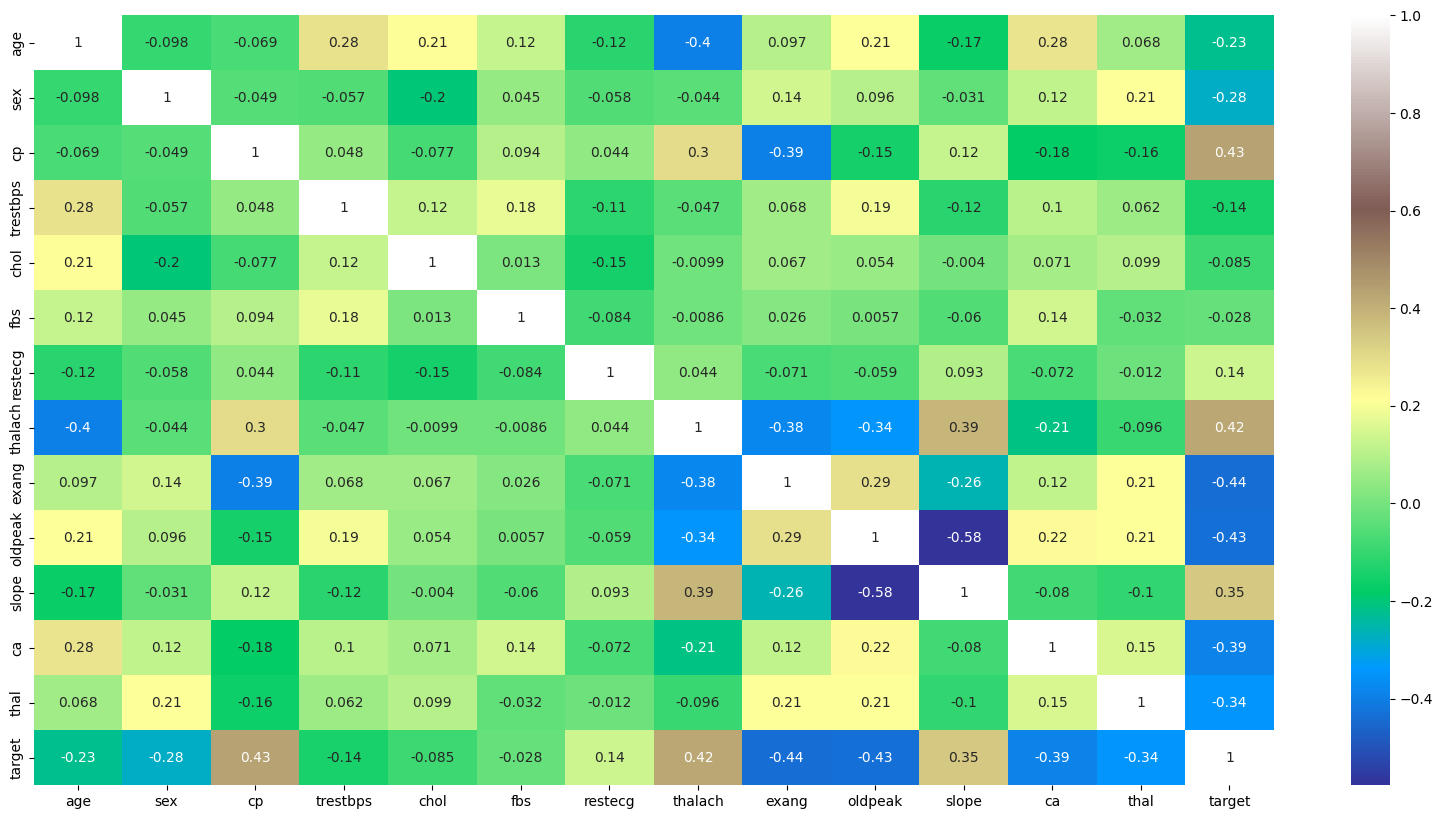

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='terrain')

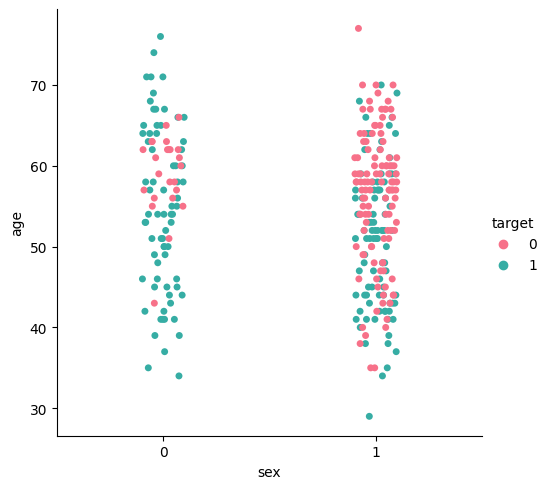

In [45]:
sns.catplot(data=df,x='sex',y='age',hue='target',palette='husl')

<Axes: xlabel='sex', ylabel='chol'>

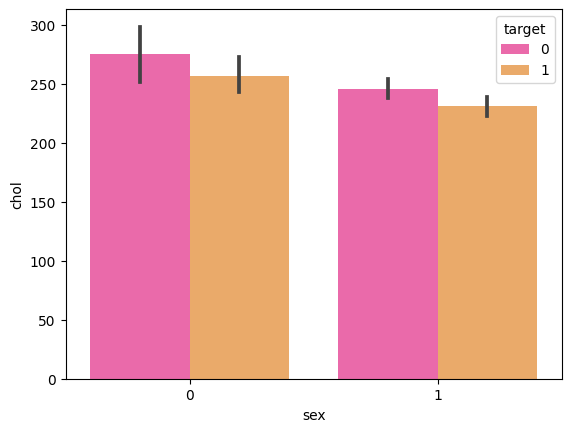

In [46]:
sns.barplot(data=df,x='sex',y='chol',hue='target',palette='spring')

## PREPARING THE DATA FOR MODEL

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])


## AFTER SCALING

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [53]:
X=df.drop(['target'],axis=1)
y=df['target']

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

## CHECK SAMPLE SIZE

In [55]:
print('X_train',X_train.size)
print('X_test',X_test.size)
print('y_train',y_train.size)
print('y_test',y_test.size)


X_train 2756
X_test 1183
y_train 212
y_test 91


## LOGISTIC REGREESION

In [56]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1=lr.fit(X_train,y_train)
prediction1 = model1.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]], dtype=int64)

<Axes: >

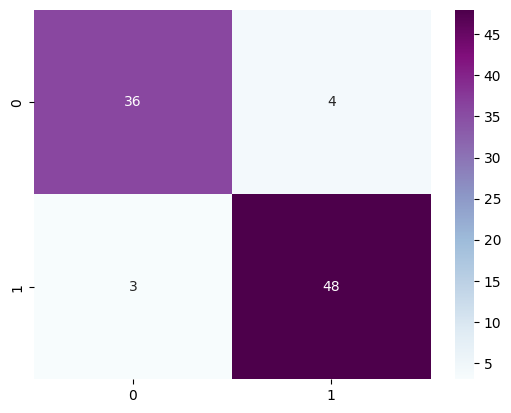

In [59]:
sns.heatmap(cm,annot=True,cmap='BuPu')

In [62]:
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print('TESTING ACCURACY',(TP+TN)/(TP+TN+FN+FP))

TESTING ACCURACY 0.9230769230769231


In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.9230769230769231

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



In [69]:
print('LOGISTIC REGRESSION',accuracy_score(y_test,prediction1))

LOGISTIC REGRESSION 0.9230769230769231
